# Problem 2

This notebook contains the solution for the second part of the Exercice 5.

## Imports

In [14]:
from scipy.integrate import quad
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Functions

In [4]:
def integralCos(t, T, n, d=1):
  return np.cos(2 * np.pi * n * t/T/d)

def integralSin(t, T, n, d=1):
  return np.sin(2* np.pi * n * t/T/d)

def integratorCos(t, T, n, period):
  return (2/T) * quad(integralCos, 0, T/period, args=(T, n))[0]
    
def integratorSin(t, T, n, period):
  return (2/T) * quad(integralSin, 0, T/period, args=(T, n))[0]

def fourrier(t, T, n, period):
  return (integralCos(t, T, n) *
          integratorCos(t, T, n, period) + 
          integralSin(t, T, n) * 
          integratorSin(t, T, n, period))

## Initial periodic signals

### - Channel 1 (101010) 

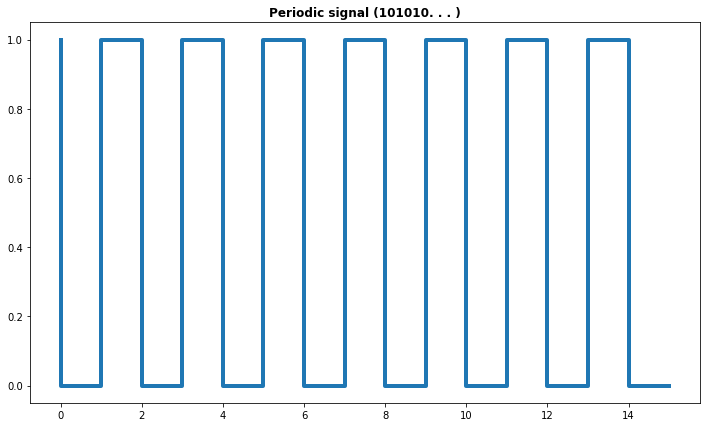

In [11]:
plt.figure(figsize=(12,7))
ps1 = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
xaxis = np.arange(0, 16)
yaxis = np.array(ps1)
plt.step(xaxis, yaxis, linewidth=4,)
plt.title('Periodic signal (101010. . . )', fontweight='bold')
plt.savefig('ps1.jpg')
plt.show()

### - Channel X (100100)

x = 6 or x = 3

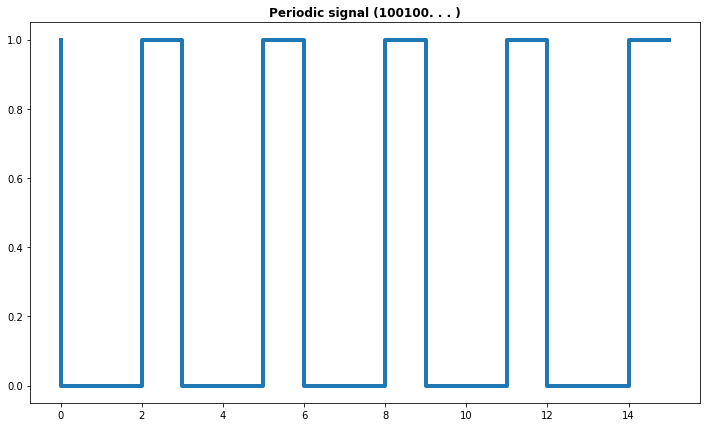

In [12]:
plt.figure(figsize=(12,7))
ps2 = [1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]
xaxis = np.arange(0, 16)
yaxis = np.array(ps2)
plt.step(xaxis, yaxis, linewidth=4,)
plt.title('Periodic signal (100100. . . )', fontweight='bold')
plt.savefig('ps2.jpg')
plt.show()

## No interferences signals

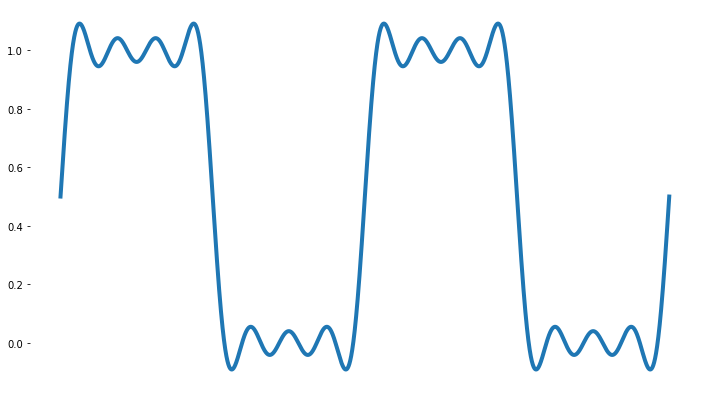

In [5]:
transmissionRate = 6*10**(6)
Tb = 1/transmissionRate
Ts = 2 * Tb

T1 = 1/3 *10**(-6)
y = 0.5

period = 2

t = np.linspace(0,Ts*2,10000)

for n in range(1,8):
  y += fourrier(t, T1, n, period)
  
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)    
plt.plot(t, y, linewidth=4)
ax1.axes.get_xaxis().set_visible(False)
plt.savefig('s1.jpg')
plt.show()

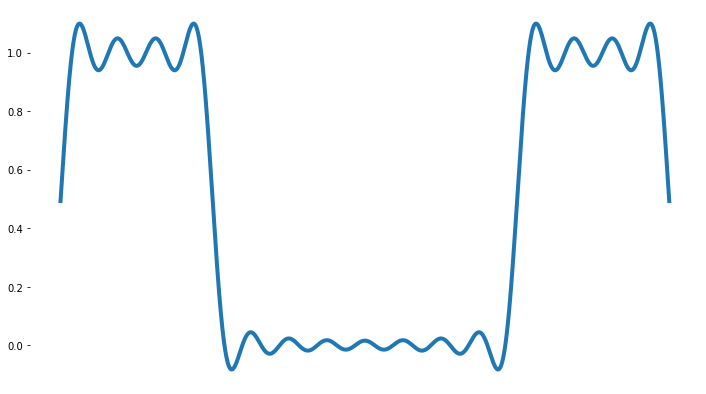

In [6]:
bittime = 10**(-6)/6
limit = 2*bittime
yx = 2/6
Tx = 1/2 *10**(-6)
period = 3

for n in range(1,12):
  yx += fourrier(t, Tx, n, period)

plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)
plt.plot(t, yx, linewidth=4)
ax1.axes.get_xaxis().set_visible(False)
plt.savefig('s2.jpg')
plt.show()

## Modulated Signals

### Channel 1

In [7]:
period = 2
channel1 = int(2401 + 22/2)
print(channel1)

# A Coefficient
sig1AY = []
sig1AX = []

# Adding central one
sig1AY.append(integratorCos(t, T1, 0, period))
sig1AX.append(channel1)

for n in range(1,4):
  sig1AY.append(integratorCos(t, T1, n, period)/2)
  sig1AY.append(integratorCos(t, T1, n, period)/2)   
  sig1AX.append(channel1 + n*3)
  sig1AX.append(channel1 - n*3)

# B Coefficient
sig1BY = []
sig1BX = []

# Adding central one
sig1BY.append(integratorSin(t, T1, 0, period))
sig1BX.append(channel1)

for n in range(1,4):
  sig1BY.append(integratorSin(t, T1, n, period)/2)    
  sig1BY.append(integratorSin(t, T1, n, period)/2)   
  sig1BX.append(channel1 + n*3)
  sig1BX.append(channel1 - n*3)

2412


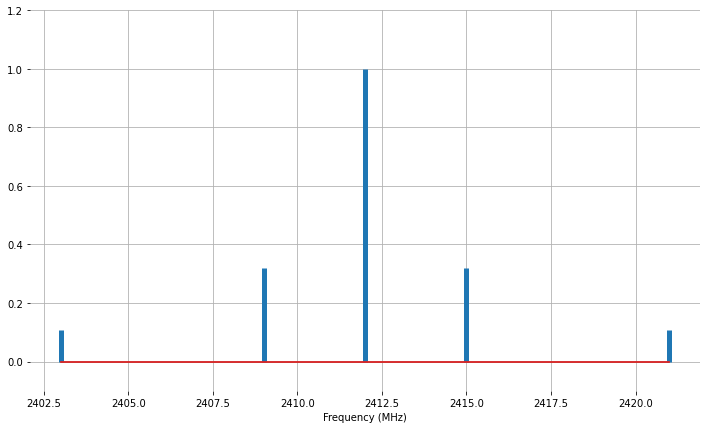

In [73]:
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)
x=range(channel1-11, channel1+11)

markerline, stemlines, baseline =  plt.stem(sig1AX, sig1AY, '-', 'None')
plt.setp(stemlines, linewidth = 5)
plt.setp(markerline, markersize = 5)

markerline, stemlines, baseline = plt.stem(sig1BX, sig1BY, '-', 'None')
plt.setp(stemlines, linewidth = 5)
plt.setp(markerline, markersize = 5)

plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylim(-0.1, 1.2)
plt.savefig('modulated_bs.jpg')
plt.show()

In [66]:
sig1AX

[2412, 2415, 2409, 2418, 2406, 2421, 2403]

In [67]:
sig1AY

[1.0,
 1.6491443556331193e-17,
 1.6491443556331193e-17,
 -6.938893903907228e-18,
 -6.938893903907228e-18,
 3.107000181239342e-17,
 3.107000181239342e-17]

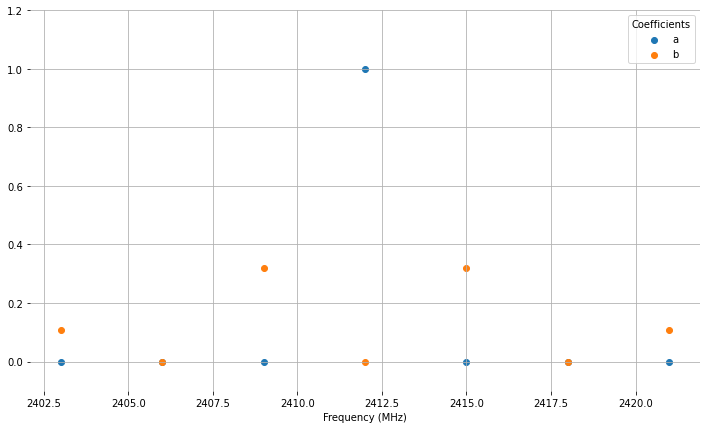

In [74]:
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)
x=range(channel1-11, channel1+11)

plt.scatter(sig1AX, sig1AY, label="a")
plt.scatter(sig1BX, sig1BY, label="b")
plt.xlabel('Frequency (MHz)')
plt.grid()
ax1.legend(title="Coefficients")
plt.ylim(-0.1, 1.2)
plt.savefig('modulated_bs_coef.jpg')
plt.show()

### Channel 2